In [4]:
import numpy as np
import sep

In [5]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [6]:
image_file = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

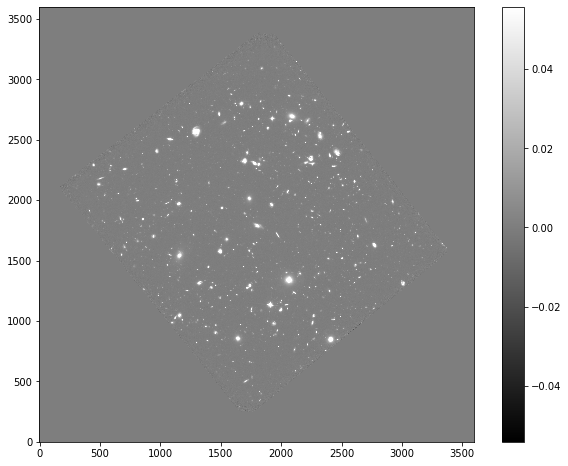

In [7]:
data = fits.getdata(image_file, ext=0)
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("Example.png")

Displaying an example image of the orginial fits file

In [8]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

Subtracting the background from the orginial fits image

In [9]:
bkg_image = bkg.back()

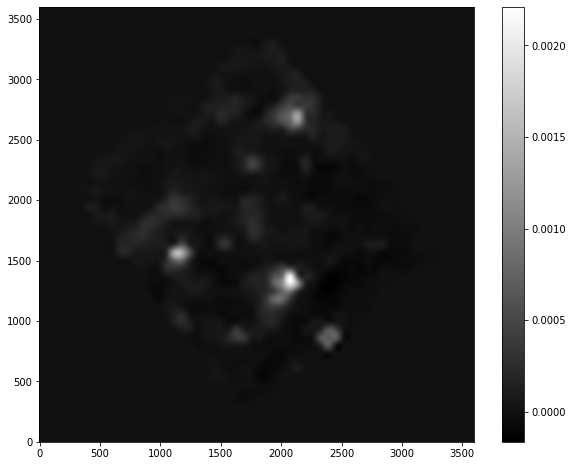

In [10]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("Background.png")

In [11]:
bkg_rms = bkg.rms()

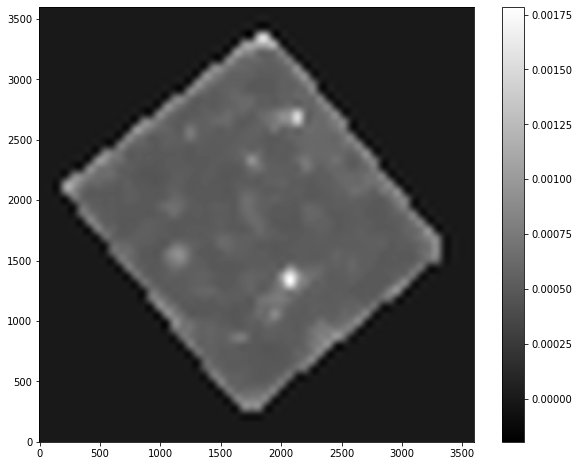

In [12]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("BackgroundNoise.png")

Shows the noise of the background image

In [13]:
data_sub = data - bkg

A value that is the orginal data minus the background

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

8640

Looks for objects now that the background nosie has been subtracted

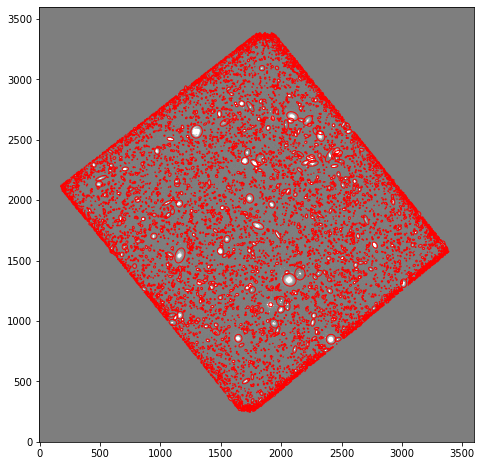

In [15]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("Objects.png")

highlights the area around each object

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [17]:
fluxlist = []
for i in range(len(objects)):
    fluxlist.append(flux[i])

(array([8.639e+03, 1.000e+00]),
 array([ -1.06136543, 403.11795907, 807.29728357]),
 <BarContainer object of 2 artists>)

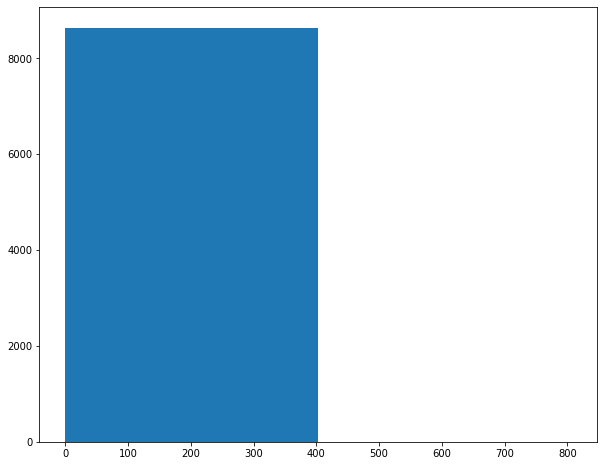

In [18]:
plt.hist(fluxlist, bins=2)

In [19]:
biggest = 0
for i in fluxlist:
    if abs(i-np.mean(fluxlist)) > biggest:
        biggest = i

In [22]:
print(f'There are {len(objects)} sources')
print(f'The median of the flux of the sources is {np.median(fluxlist)}')
print(f'The mean of the flux of the sources is {np.mean(fluxlist)}')
print(f'The standard devation of the flux of the sources is {np.std(fluxlist)}')

There are 8640 sources
The median of the flux of the sources is 0.030960064365426664
The mean of the flux of the sources is 0.36185728037707154
The standard devation of the flux of the sources is 9.243528029706706


In [25]:
stdaway = ((biggest-np.mean(fluxlist))/np.std(fluxlist))
print(f'The biggest flux outlier is {biggest}')
print(f'The outlier is {stdaway} standard deivations from the mean')

The biggest flux outlier is 807.2972835731507
The outlier is 87.29734184820526 standard deivations from the mean


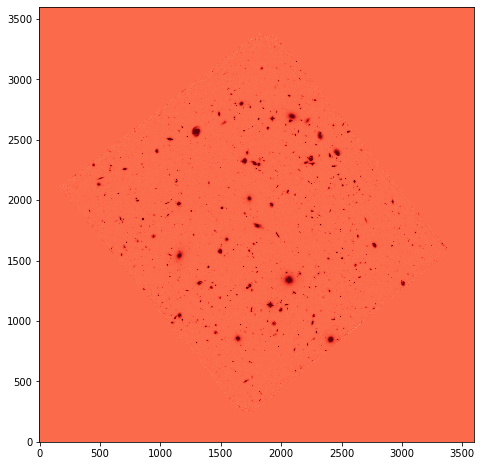

In [27]:
imagef105w = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data105 = fits.getdata(imagef105w, ext=0)
m, s = np.mean(data105), np.std(data105)
plt.imshow(data105, interpolation='nearest', cmap='Reds', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("105shifted.png")

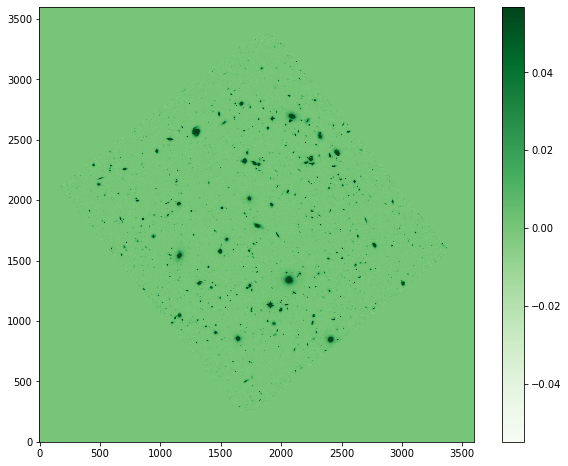

In [28]:
imagef125w = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
data125 = fits.getdata(imagef125w, ext=0)
m, s = np.mean(data125), np.std(data125)
plt.imshow(data125, interpolation='nearest', cmap='Greens', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("125shifted.png")

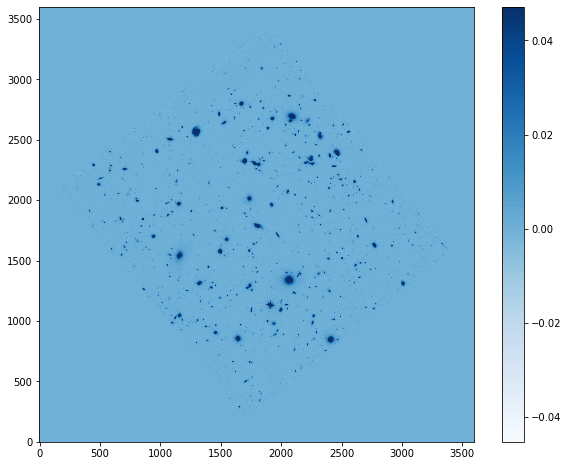

In [30]:
imagef160w = get_pkg_data_filename('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
data160 = fits.getdata(imagef160w, ext=0)
m, s = np.mean(data160), np.std(data160)
plt.imshow(data160, interpolation='nearest', cmap='Blues', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("160shifted.png")